#Lab2: Implementing Linear Regression with One and Multiple Variables 

In this lab, you are going to learn how to implement a linear regression model using the gradient decent algorithm.

## 1) Linear Regression with One Variable 


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
data=pd.read_csv("Uni_linear.txt", header=None)

In [32]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

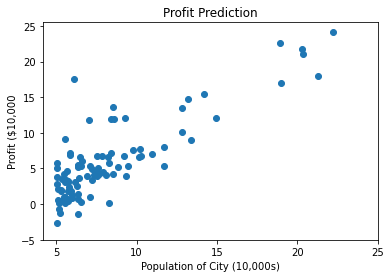

In [34]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### Compute the Cost Function $J(\Theta)$

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [35]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y) 
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

Now you are going to test your cost function. You should get X and y from the dataset above. Then test the cost function with 0 as initial value of all Thetas. When you build the vector X do not forget to add the feature for the bias parameter $x_0=1$
. The expected value of the cost is  32.072733877455676

In [36]:
##### WRITE YOUR CODE HERE #####
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

################################

computeCost(X,y,theta)

[[3.09478464e+02]
 [8.33605520e+01]
 [1.86650244e+02]
 [1.40517316e+02]
 [4.65574229e+01]
 [1.41276996e+02]
 [1.89077129e+01]
 [1.44000000e+02]
 [4.35428417e+01]
 [1.45664356e+01]
 [1.05768048e+01]
 [2.40405025e+02]
 [9.95465601e+00]
 [5.22121856e+01]
 [5.12913792e-01]
 [1.23404664e+01]
 [2.81409030e+01]
 [3.14462993e-01]
 [1.33356432e+01]
 [2.90445545e+01]
 [9.85080996e+00]
 [4.73802289e+02]
 [1.81731690e+01]
 [2.69101562e+01]
 [9.50180625e+00]
 [5.12479044e+02]
 [1.82277001e+02]
 [4.96559809e+01]
 [2.15854864e+02]
 [5.83077609e+02]
 [1.48840000e+00]
 [3.59592116e+01]
 [1.47233956e+02]
 [3.42065025e+00]
 [4.28056148e+01]
 [2.08145813e+01]
 [1.69447490e+01]
 [1.15110918e+01]
 [1.02353689e+02]
 [3.02214068e+01]
 [3.09770165e-01]
 [1.52998323e+01]
 [2.90025332e+01]
 [5.95652836e+00]
 [4.53171312e+01]
 [1.09474369e+00]
 [2.63548757e+01]
 [3.40033600e+00]
 [6.40688185e+01]
 [1.03612041e+00]
 [4.55679002e+01]
 [3.38412816e+00]
 [1.83912322e+01]
 [2.49810036e+01]
 [2.02578289e+00]
 [2.019525

32.072733877455676

### Gradient Descent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat until convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

At each iteration the costfunction value is stored in the J_History array so then the behavior of the algorithm can be graphically displayed.   


In [10]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y) ## the number of training examples
    J_history=[]
    
    for i in range(num_iters):

      ##### WRITE YOUR CODE HERE #####
      predictions = X.dot(theta)
      error = np.dot(X.transpose(),(predictions -y))
      descent=alpha * 1/m * error
      theta-=descent
      ################################
      J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

### Visualizing the Cost Function $J(\Theta)$

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

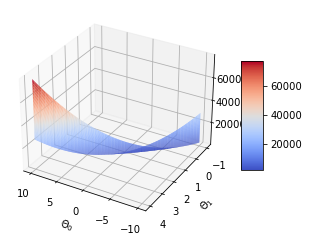

In [13]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)


In [14]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


### Testing the implementation

Plot $J(\Theta)$ against the number of iteration 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

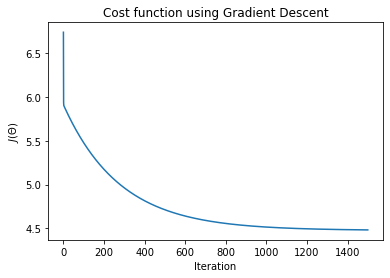

In [15]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Graph with Line of Best Fit

Text(0.5, 1.0, 'Profit Prediction')

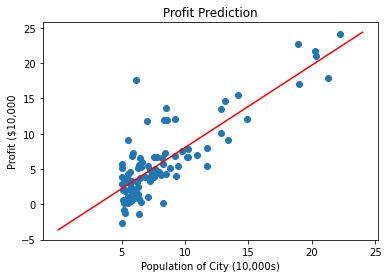

In [16]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

### Make predictions using the optimized $\Theta$ values

$h_\Theta(x) = \Theta^Tx$

In [17]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    ##### WRITE YOUR CODE HERE #####
    predictions= np.dot(theta.transpose(),x) 
    ################################
    
    return predictions[0]

Test the prediction function. The expected outcome should be:

For population = 35,000, we predict a profit of $4520.0

In [18]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


## 2) Linear Regression with Multiple Variable 

### Loading of Data

In [19]:
data2=pd.read_csv("Multi_linear.txt", header=None)

### Ploting of Data


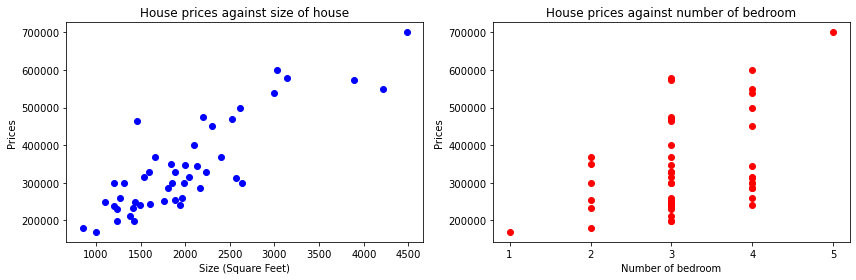

In [20]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

# Enhance layout
plt.tight_layout()

### Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [21]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    ##### WRITE YOUR CODE HERE #####
    X_norm = (X - mean)/std
    ################################
    
    return X_norm , mean , std

Now Apply feature normalization on the dataset above. Do not forget to first normalize the features and then add the feature for the bias parameter  $x_0=1$. Moreoverm initialize your the theta vector to 0. 

In [27]:
 ##### WRITE YOUR CODE HERE #####
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))
 ################################

In [29]:
X2

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

Test the cost function on your data with the initila values of theta equal to 0. The ecpected outcome is: 65591548106.45744. 

In [28]:

computeCost(X2,y2,theta2)


65591548106.45744

### Gradient Descent

Test the previousely implemented gradient decent algoritm by running the followinf code. The expected outcome is: h(x) =340412.66 + 109447.8x1 + -6578.35x2. 

In [29]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


### Visualizing the Cost Function $J(\Theta)$


Text(0.5, 1.0, 'Cost function using Gradient Descent')

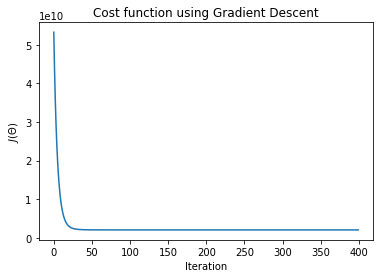

In [31]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Make predictions using the optimized $\Theta$ values

Predict the house price for the following features: 
size = 1650, Number of bedroom = 3. Do not forget to normalize the features of the input before doing the prediction. 
The exepected outcome is $456439.0

In [33]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))


For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
